In [44]:
import pandas as pd

In [45]:
trip1_potholes = pd.read_csv('trip1_potholes.csv')
trip1_sensors = pd.read_csv('trip1_sensors.csv')
trip2_potholes = pd.read_csv('trip2_potholes.csv')
trip2_sensors = pd.read_csv('trip2_sensors.csv')
trip3_potholes = pd.read_csv('trip3_potholes.csv')
trip3_sensors = pd.read_csv('trip3_sensors.csv')
trip4_potholes = pd.read_csv('trip4_potholes.csv')
trip4_sensors = pd.read_csv('trip4_sensors.csv')
trip5_potholes = pd.read_csv('trip5_potholes.csv')
trip5_sensors = pd.read_csv('trip5_sensors.csv')

In [46]:
trip1_potholes.columns

Index(['timestamp'], dtype='object')

In [47]:
trip1_sensors.columns

Index(['timestamp', 'latitude', 'longitude', 'speed', 'accelerometerX',
       'accelerometerY', 'accelerometerZ', 'gyroX', 'gyroY', 'gyroZ'],
      dtype='object')

In [48]:
for df in [trip1_sensors, trip1_potholes]:
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
for df in [trip2_sensors, trip2_potholes]:
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
for df in [trip3_sensors, trip3_potholes]:
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
for df in [trip4_sensors, trip4_potholes]:
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
for df in [trip5_sensors, trip5_potholes]:
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

In [49]:
trip1_sensors['pothole'] = 0

for pothole_time in trip1_potholes['timestamp']:
    mask = (trip1_sensors['timestamp'] >= pothole_time - pd.Timedelta(seconds=0.5)) & \
           (trip1_sensors['timestamp'] <= pothole_time + pd.Timedelta(seconds=0.5))
    trip1_sensors.loc[mask, 'pothole'] = 1


In [50]:
trip2_sensors['pothole'] = 0
for pothole_time in trip2_potholes['timestamp']:
    mask = (trip2_sensors['timestamp'] >= pothole_time - pd.Timedelta(seconds=0.5)) & \
           (trip2_sensors['timestamp'] <= pothole_time + pd.Timedelta(seconds=0.5))
    trip2_sensors.loc[mask, 'pothole'] = 1

trip3_sensors['pothole'] = 0
for pothole_time in trip3_potholes['timestamp']:
    mask = (trip3_sensors['timestamp'] >= pothole_time - pd.Timedelta(seconds=0.5)) & \
           (trip3_sensors['timestamp'] <= pothole_time + pd.Timedelta(seconds=0.5))
    trip3_sensors.loc[mask, 'pothole'] = 1

trip4_sensors['pothole'] = 0
for pothole_time in trip4_potholes['timestamp']:
    mask = (trip4_sensors['timestamp'] >= pothole_time - pd.Timedelta(seconds=0.5)) & \
           (trip4_sensors['timestamp'] <= pothole_time + pd.Timedelta(seconds=0.5))
    trip4_sensors.loc[mask, 'pothole'] = 1

trip5_sensors['pothole'] = 0
for pothole_time in trip5_potholes['timestamp']:
    mask = (trip5_sensors['timestamp'] >= pothole_time - pd.Timedelta(seconds=0.5)) & \
           (trip5_sensors['timestamp'] <= pothole_time + pd.Timedelta(seconds=0.5))
    trip5_sensors.loc[mask, 'pothole'] = 1

In [51]:
trip1_sensors['trip_id'] = 1
trip2_sensors['trip_id'] = 2
trip3_sensors['trip_id'] = 3
trip4_sensors['trip_id'] = 4
trip5_sensors['trip_id'] = 5

In [52]:
all_trips = pd.concat([
    trip1_sensors, trip2_sensors, trip3_sensors,
    trip4_sensors, trip5_sensors
], ignore_index=True)


In [53]:
all_trips.isna().sum()

,0
timestamp,0
latitude,0
longitude,0
speed,0
accelerometerX,0
accelerometerY,0
accelerometerZ,0
gyroX,0
gyroY,0
gyroZ,0


In [54]:
all_trips.describe()

,timestamp,latitude,longitude,speed,accelerometerX,accelerometerY,accelerometerZ,gyroX,gyroY,gyroZ,pothole,trip_id
count,9859,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000,9859.000000
mean,2017-04-23 04:17:10.218764800,40.448762,-79.947498,6.855371,0.050948,-0.950540,0.233593,-0.014650,-0.007315,0.000969,0.051831,2.885485
min,2017-04-19 21:56:04.500000,40.445287,-79.950503,-1.000000,-1.189911,-1.817200,-0.836624,-1.228333,-0.969532,-0.916397,0.000000,1.000000
25%,2017-04-24 02:45:34.700000,40.446400,-79.948805,1.680000,0.003510,-0.988510,0.156059,-0.038426,-0.048936,-0.030489,0.000000,2.000000
50%,2017-04-24 02:54:18.400000,40.447453,-79.947426,6.920000,0.049072,-0.951263,0.240067,-0.013889,-0.005221,-0.000140,0.000000,3.000000
75%,2017-04-24 03:02:56.500000,40.451278,-79.946534,11.210000,0.103455,-0.914345,0.317467,0.009003,0.036979,0.031084,0.000000,4.000000
max,2017-04-24 03:18:52.299999952,40.453572,-79.944177,19.120001,1.332397,0.287598,1.197723,0.754990,0.987630,0.643305,1.000000,5.000000
std,NaN,0.002761,0.001675,5.109471,0.148236,0.099776,0.149300,0.083209,0.164344,0.097823,0.221697,1.414060


In [55]:
all_trips.corr()

,timestamp,latitude,longitude,speed,accelerometerX,accelerometerY,accelerometerZ,gyroX,gyroY,gyroZ,pothole,trip_id
timestamp,1.000000,-0.011448,0.067629,0.116492,0.032108,0.057162,0.095947,0.019510,0.010720,0.000193,0.050307,0.720653
latitude,-0.011448,1.000000,0.151766,0.068677,0.087507,-0.003493,-0.028040,-0.005732,0.142793,-0.068215,0.041830,0.008711
longitude,0.067629,0.151766,1.000000,0.067631,0.059179,0.005621,-0.006982,-0.002253,0.098157,-0.060591,-0.181891,0.073395
speed,0.116492,0.068677,0.067631,1.000000,-0.030350,-0.042508,-0.155545,-0.011312,0.011970,-0.007317,0.186625,0.143716
accelerometerX,0.032108,0.087507,0.059179,-0.030350,1.000000,0.042067,-0.040880,-0.154603,0.495710,-0.337708,-0.011963,0.029650
accelerometerY,0.057162,-0.003493,0.005621,-0.042508,0.042067,1.000000,0.329938,-0.237226,-0.058609,0.065716,0.002327,0.050932
accelerometerZ,0.095947,-0.028040,-0.006982,-0.155545,-0.040880,0.329938,1.000000,-0.006543,-0.052403,0.051253,-0.022685,0.086288
gyroX,0.019510,-0.005732,-0.002253,-0.011312,-0.154603,-0.237226,-0.006543,1.000000,-0.248306,0.311818,0.002210,0.024430
gyroY,0.010720,0.142793,0.098157,0.011970,0.495710,-0.058609,-0.052403,-0.248306,1.000000,-0.777431,-0.001434,0.004825
gyroZ,0.000193,-0.068215,-0.060591,-0.007317,-0.337708,0.065716,0.051253,0.311818,-0.777431,1.000000,0.009360,0.003349


In [56]:
import matplotlib.pyplot as plt

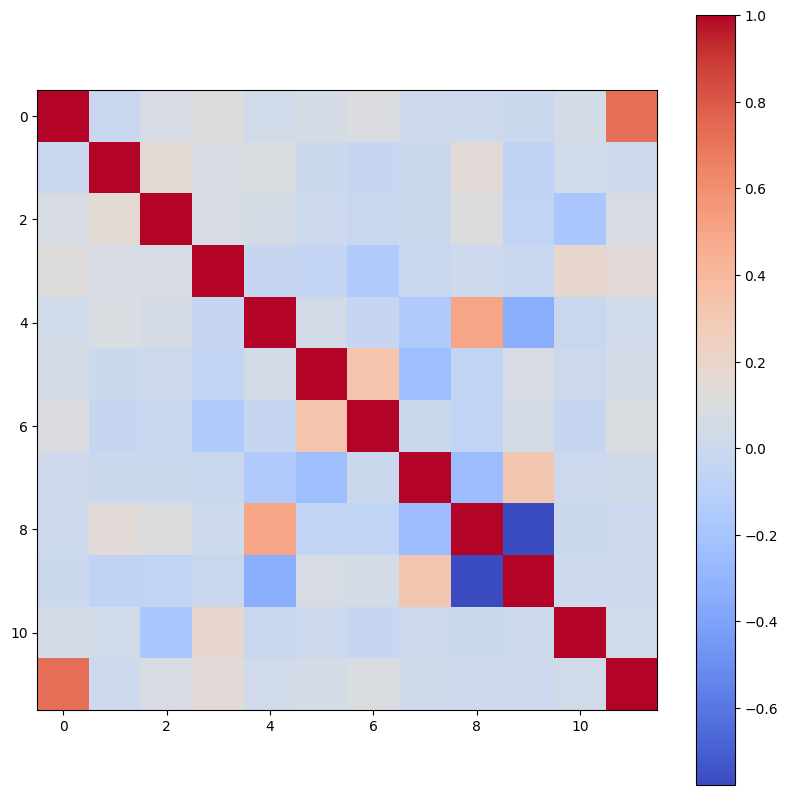

In [57]:
# plot corr as graph
plt.figure(figsize=(10, 10))
plt.imshow(all_trips.corr(), cmap='coolwarm', interpolation='nearest')
plt.colorbar()

<Axes: >

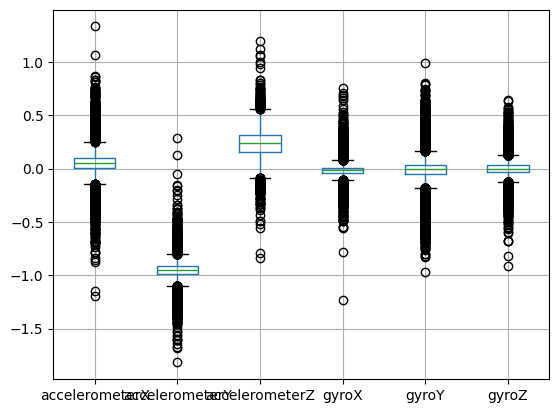

In [58]:
# boxplots
all_trips.boxplot(column=['accelerometerX', 'accelerometerY', 'accelerometerZ', 'gyroX', 'gyroY', 'gyroZ'])

In [59]:
# drop the values which are highly away in the above boxplots shown
all_trips = all_trips[(all_trips['accelerometerX'] < 10) & (all_trips['accelerometerX'] > -10)]
all_trips = all_trips[(all_trips['accelerometerY'] < 10) & (all_trips['accelerometerY'] > -10)]
all_trips = all_trips[(all_trips['accelerometerZ'] < 10) & (all_trips['accelerometerZ'] > -10)]
all_trips = all_trips[(all_trips['gyroX'] < 10) & (all_trips['gyroX'] > -10)]
all_trips = all_trips[(all_trips['gyroY'] < 10) & (all_trips['gyroY'] > -10)]
all_trips = all_trips[(all_trips['gyroZ'] < 10) & (all_trips['gyroZ'] > -10)]

In [60]:
all_trips['acclermeter_magnitude'] = (all_trips['accelerometerX']**2 + all_trips['accelerometerY']**2 + all_trips['accelerometerZ']**2)**0.5
all_trips['gyro_magnitude'] = (all_trips['gyroX']**2 + all_trips['gyroY']**2 + all_trips['gyroZ']**2)**0.5

In [61]:
all_trips.columns

Index(['timestamp', 'latitude', 'longitude', 'speed', 'accelerometerX',
       'accelerometerY', 'accelerometerZ', 'gyroX', 'gyroY', 'gyroZ',
       'pothole', 'trip_id', 'acclermeter_magnitude', 'gyro_magnitude'],
      dtype='object')

In [62]:
features = ['latitude', 'longitude', 'speed', 'accelerometerX',
       'accelerometerY', 'accelerometerZ', 'gyroX', 'gyroY', 'gyroZ',
        'acclermeter_magnitude', 'gyro_magnitude']

In [63]:
features_modified = ['latitude', 'longitude', 'speed',
        'acclermeter_magnitude', 'gyro_magnitude']

In [64]:
# importances of features
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(all_trips[features], all_trips['pothole'])
importances = model.feature_importances_
# write feature name with its importance
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance}")

latitude: 0.11580372504133046
longitude: 0.13832574417110902
speed: 0.10954334625949272
accelerometerX: 0.08494037552904574
accelerometerY: 0.07882418876211449
accelerometerZ: 0.07433815101170113
gyroX: 0.07107487816852097
gyroY: 0.059051164159427454
gyroZ: 0.07538232714992567
acclermeter_magnitude: 0.0978893795931793
gyro_magnitude: 0.0948267201541532


In [65]:
features = ['latitude', 'longitude', 'speed', 'accelerometerX',
       'accelerometerY', 'accelerometerZ', 'gyroX', 'gyroY', 'gyroZ', 'acclermeter_magnitude', 'gyro_magnitude']

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
all_trips[features] = scaler.fit_transform(all_trips[features])

In [67]:
all_trips['pothole'].value_counts()

,count
pothole,
0,9348
1,511


In [68]:
all_trips.columns

Index(['timestamp', 'latitude', 'longitude', 'speed', 'accelerometerX',
       'accelerometerY', 'accelerometerZ', 'gyroX', 'gyroY', 'gyroZ',
       'pothole', 'trip_id', 'acclermeter_magnitude', 'gyro_magnitude'],
      dtype='object')

In [69]:
from imblearn.over_sampling import RandomOverSampler
X = all_trips[features]
y = all_trips['pothole']
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

In [70]:
y.value_counts()

,count
pothole,
0,9348
1,9348


In [83]:
X.columns

Index(['latitude', 'longitude', 'speed', 'accelerometerX', 'accelerometerY',
       'accelerometerZ', 'gyroX', 'gyroY', 'gyroZ', 'acclermeter_magnitude',
       'gyro_magnitude'],
      dtype='object')

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.9935828877005347
F1 Score: 0.9936238044633369


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
}

In [73]:
for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f"{model_name}:")
  print("Accuracy:", accuracy)
  print("F1 Score:", f1)
  accuracy_training = accuracy_score(y_train, model.predict(X_train))
  print("Training accuracy: ", accuracy_training)

Logistic Regression:
Accuracy: 0.8128342245989305
F1 Score: 0.819773429454171
Training accuracy:  0.8091735758224124
Random Forest:
Accuracy: 0.9938502673796792
F1 Score: 0.9938878554344938
Training accuracy:  1.0
Decision Tree:
Accuracy: 0.9863636363636363
F1 Score: 0.9865470852017937
Training accuracy:  1.0
K-Nearest Neighbors:
Accuracy: 0.9564171122994652
F1 Score: 0.9582372533948245
Training accuracy:  0.9646964428991709
Support Vector Machine:
Accuracy: 0.8679144385026738
F1 Score: 0.8755667506297229
Training accuracy:  0.8756351965766248


Conclusion  
***Logistic Regression*** & ***Support Vector Machine***
- Very balanced train–test accuracy results in no overfitting.

- F1 ≈ Accuracy means performs equally well across both classes.

- Model generalizes nicely and is interpretable.

***Random Forest*** & ***Decision Tree*** (Tree based classifiers)
- Overfitting as training accuracy coming out to be 1.0

***K-Nearest Neighbors***
- Train mostly equals to Test accuracy means no overfitting, good generalization.

- Strong F1 score means balanced precision and recall.



In [74]:
# using models with parameters
models_with_param = {
    'Logistic Regression': LogisticRegression(C=10),
    'Random Forest': RandomForestClassifier(n_estimators=5),
    'Decision Tree': DecisionTreeClassifier(max_depth=10),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Support Vector Machine': SVC(C=10, kernel='rbf'),
}

In [75]:
for param_model_name, param_model in models_with_param.items():
  param_model.fit(X_train, y_train)
  y_pred = param_model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f"{param_model_name}:")
  print("Accuracy:", accuracy)
  print("F1 Score:", f1)
  accuracy_training = accuracy_score(y_train, param_model.predict(X_train))
  print("Training accuracy: ", accuracy_training)


Logistic Regression:
Accuracy: 0.8128342245989305
F1 Score: 0.819773429454171
Training accuracy:  0.8092404386199519
Random Forest:
Accuracy: 0.9871657754010695
F1 Score: 0.9873284054910243
Training accuracy:  0.9987964696442899
Decision Tree:
Accuracy: 0.9518716577540107
F1 Score: 0.9539170506912442
Training accuracy:  0.9548676116608719
K-Nearest Neighbors:
Accuracy: 0.9564171122994652
F1 Score: 0.9582372533948245
Training accuracy:  0.9646964428991709
Support Vector Machine:
Accuracy: 0.9090909090909091
F1 Score: 0.9131323454266734
Training accuracy:  0.9247124899705804


In [76]:
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [86]:
from sklearn.pipeline import Pipeline
import joblib

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', model_knn)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Pipeline Test Accuracy:", accuracy)
print("Pipeline Test F1 Score:", f1)

joblib.dump(pipeline, 'pothole_detection_model_pipeline.joblib')

print("Trained pipeline saved as 'pothole_detection_model_pipeline.joblib'")

Pipeline Test Accuracy: 0.9566844919786096
Pipeline Test F1 Score: 0.9584828293182983
Trained pipeline saved as 'pothole_detection_model_pipeline.joblib'
